## Steps
- Importing Libraries
- Import Data
- EDA
- Visualisation
- Standard Scaler
- Model Building
- Find tunning model
- Interview Question


# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.datasets import load_boston()
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,classification_report
from sklearn import tree
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi'] = 1000
sns.set_theme(style='darkgrid',palette='rainbow')
import warnings
warnings.filterwarnings('ignore')

# Import Data

In [3]:
gd = pd.read_excel('glass.xlsx',sheet_name='glass')
gd

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# EDA

In [4]:
gd.dtypes

,0
RI,float64
Na,float64
Mg,float64
Al,float64
Si,float64
K,float64
Ca,float64
Ba,float64
Fe,float64
Type,int64


In [5]:
gd.isna().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [6]:
gd = gd.dropna()

In [7]:
gd

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [8]:
gd.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


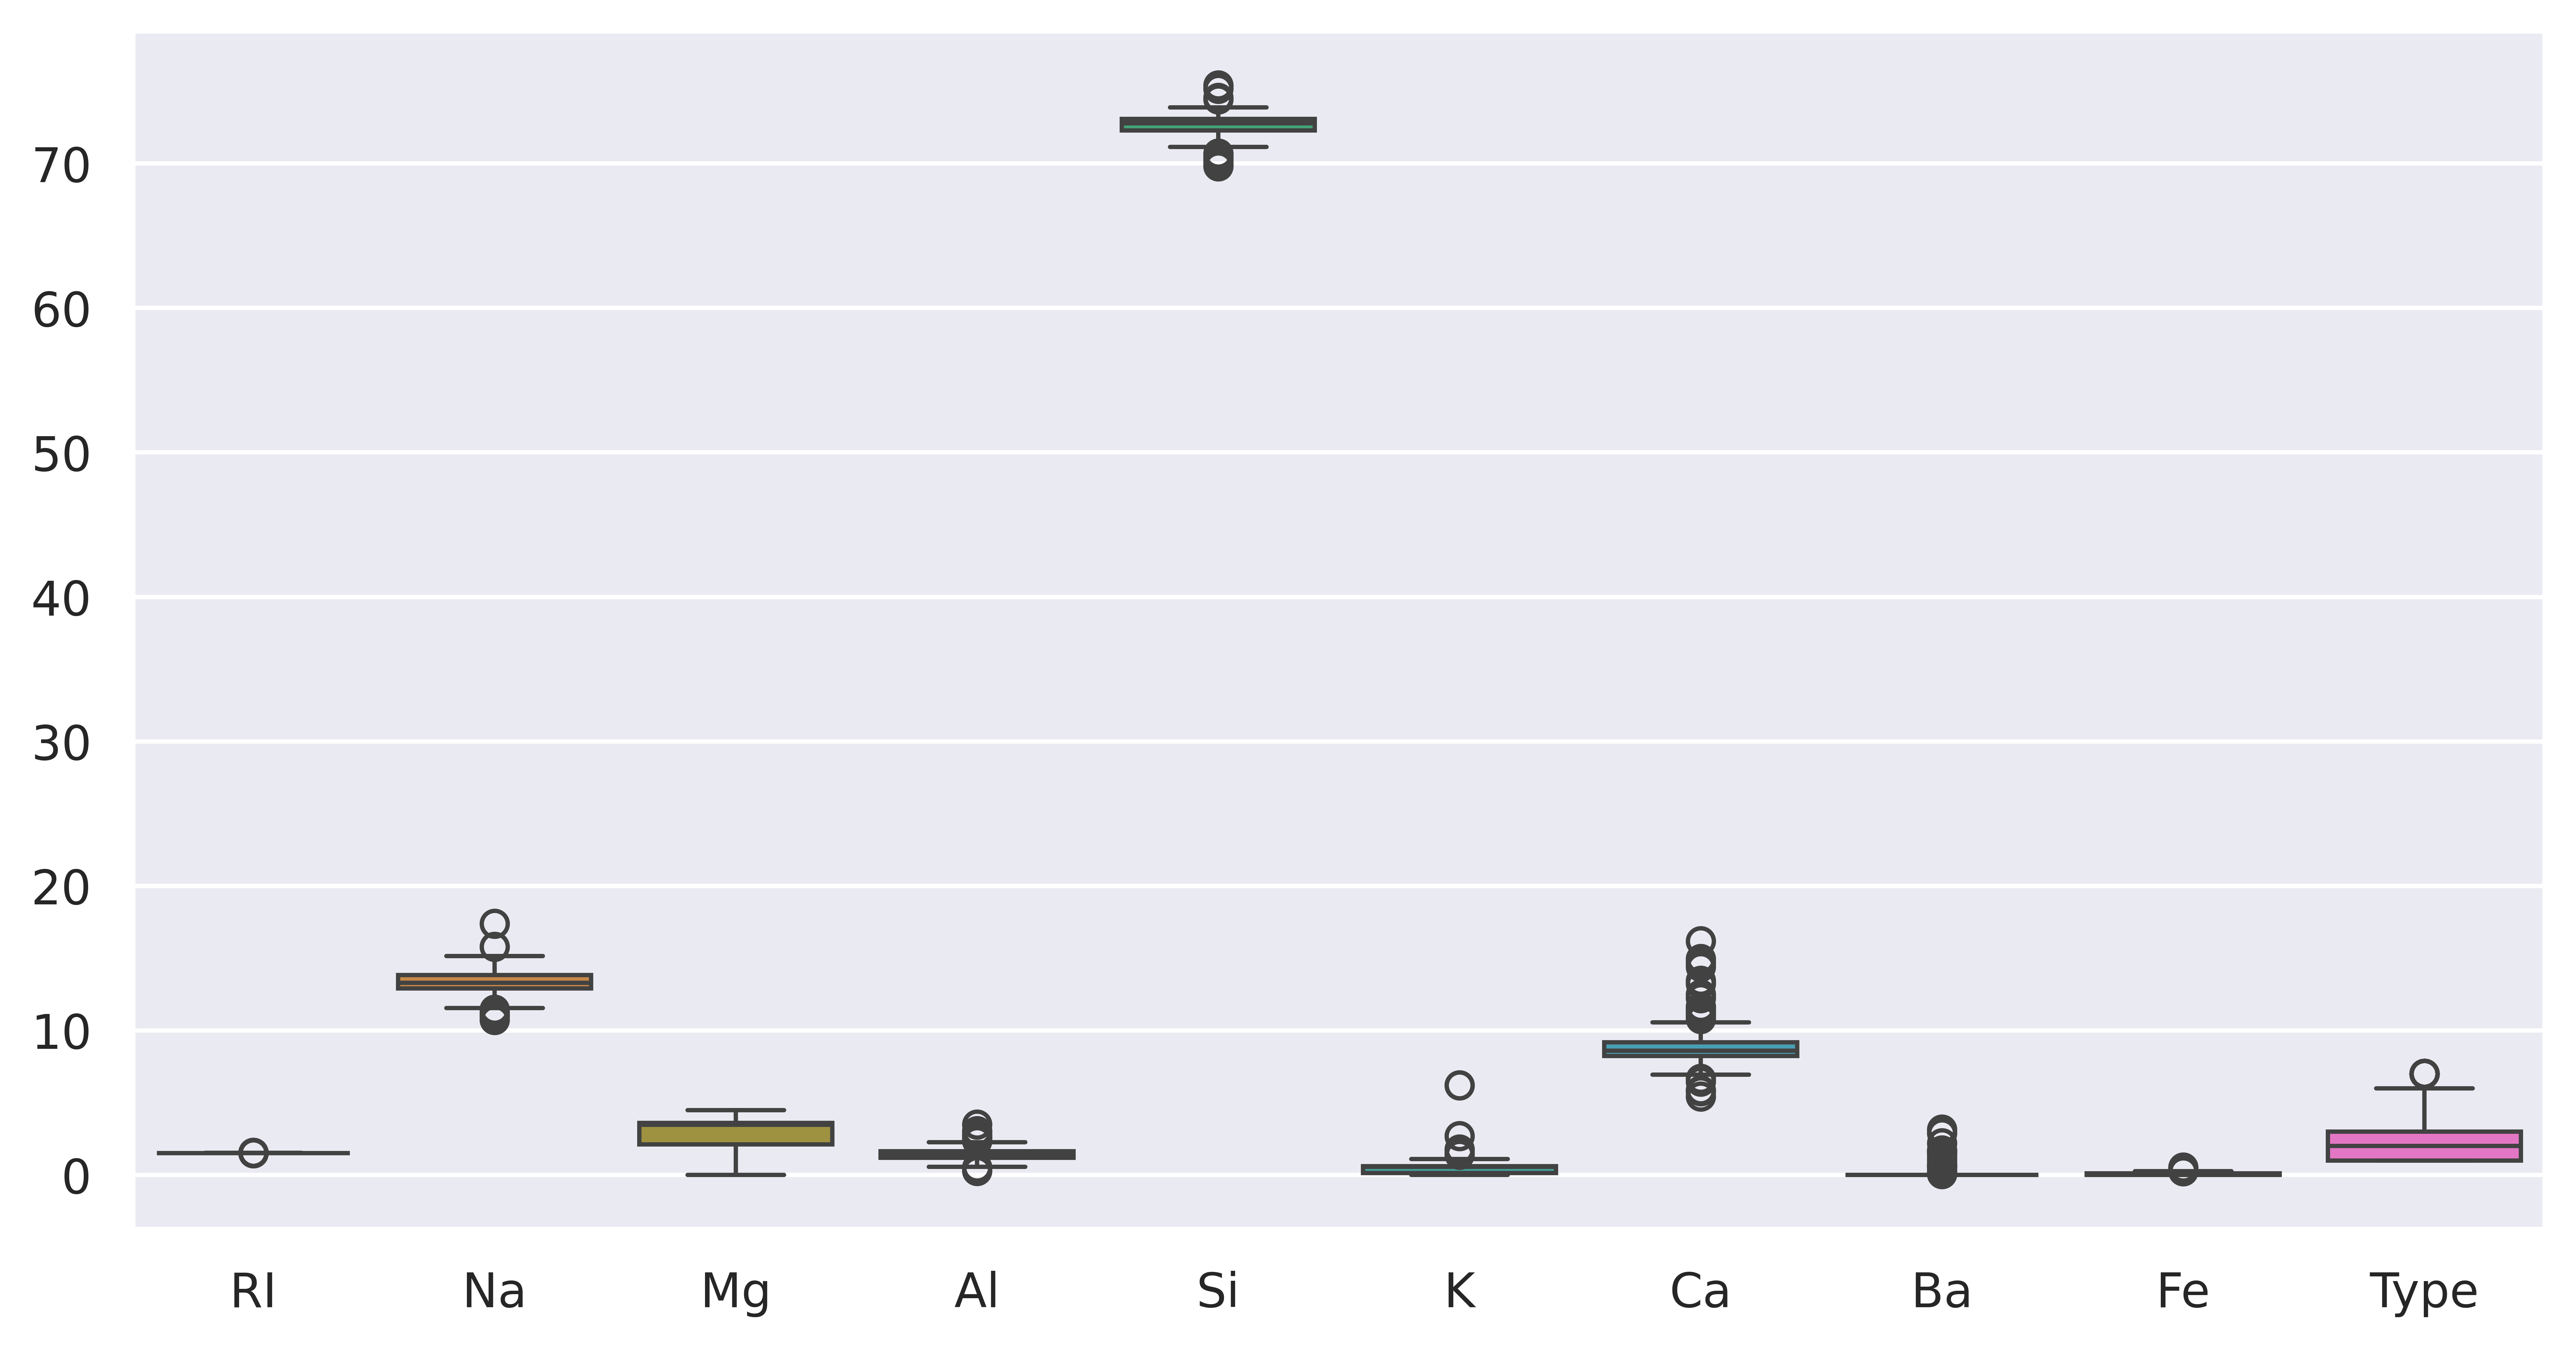

In [9]:
# checking outliers

sns.boxplot(gd)
plt.show()

In [10]:
# Removing Outliers by iqr technique

def outlier_Detection(gd,columns):
    for col in columns:
        Q1=gd[col].quantile(0.25)
        Q3=gd[col].quantile(0.75)
        iqr=Q3-Q1
        lower=Q1-1.5*iqr
        upper=Q3+1.5*iqr
        gd[col]=np.where(gd[col]>upper,upper,np.where(gd[col]<lower,lower,gd[col]))
    return gd

In [11]:
outlier_Detection(gd,['RI','Na','Al','Si','K','Ca','Ba','Fe','Type'])

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.29,72.61,0.08,9.18,0.0,0.0,6.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,0.0,0.0,6.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,0.0,0.0,6.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,0.0,0.0,6.0


# Visualisation

<Figure size 10000x5000 with 0 Axes>

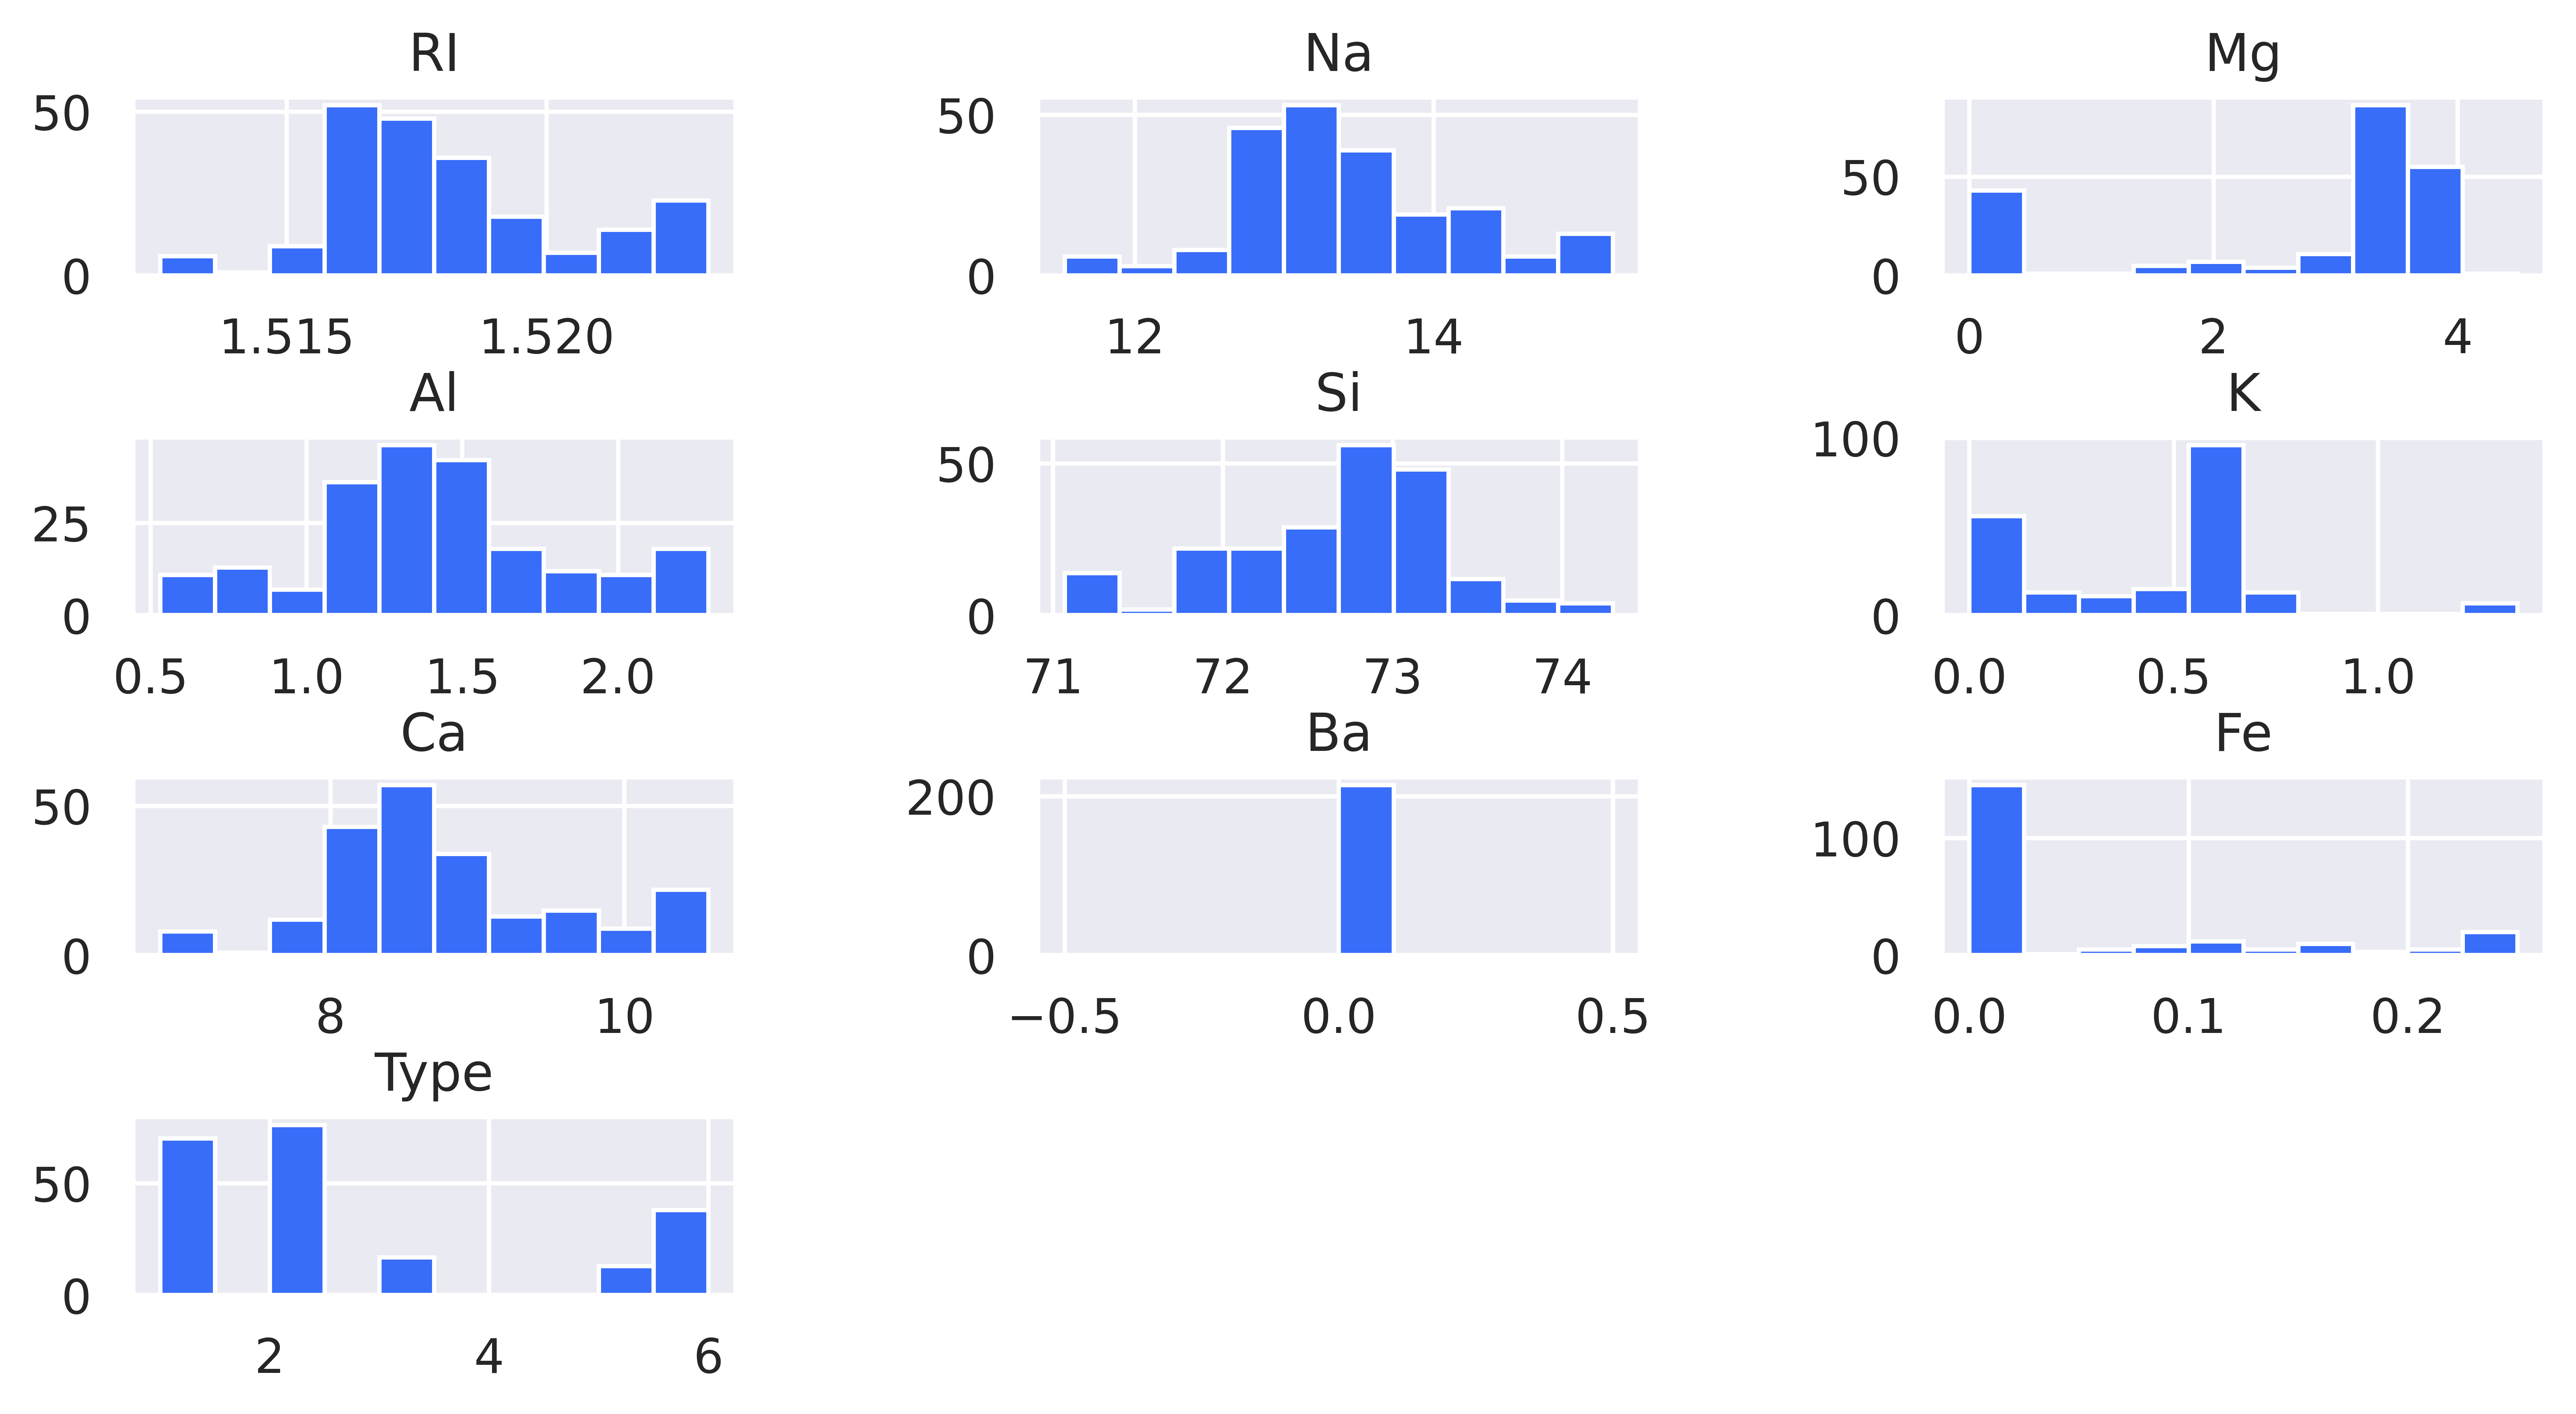

In [12]:
# Histograms

plt.figure(figsize=(10,5))
plt.tight_layout()
gd.hist()
plt.subplots_adjust(hspace = 0.9, wspace = 0.5)
plt.show()

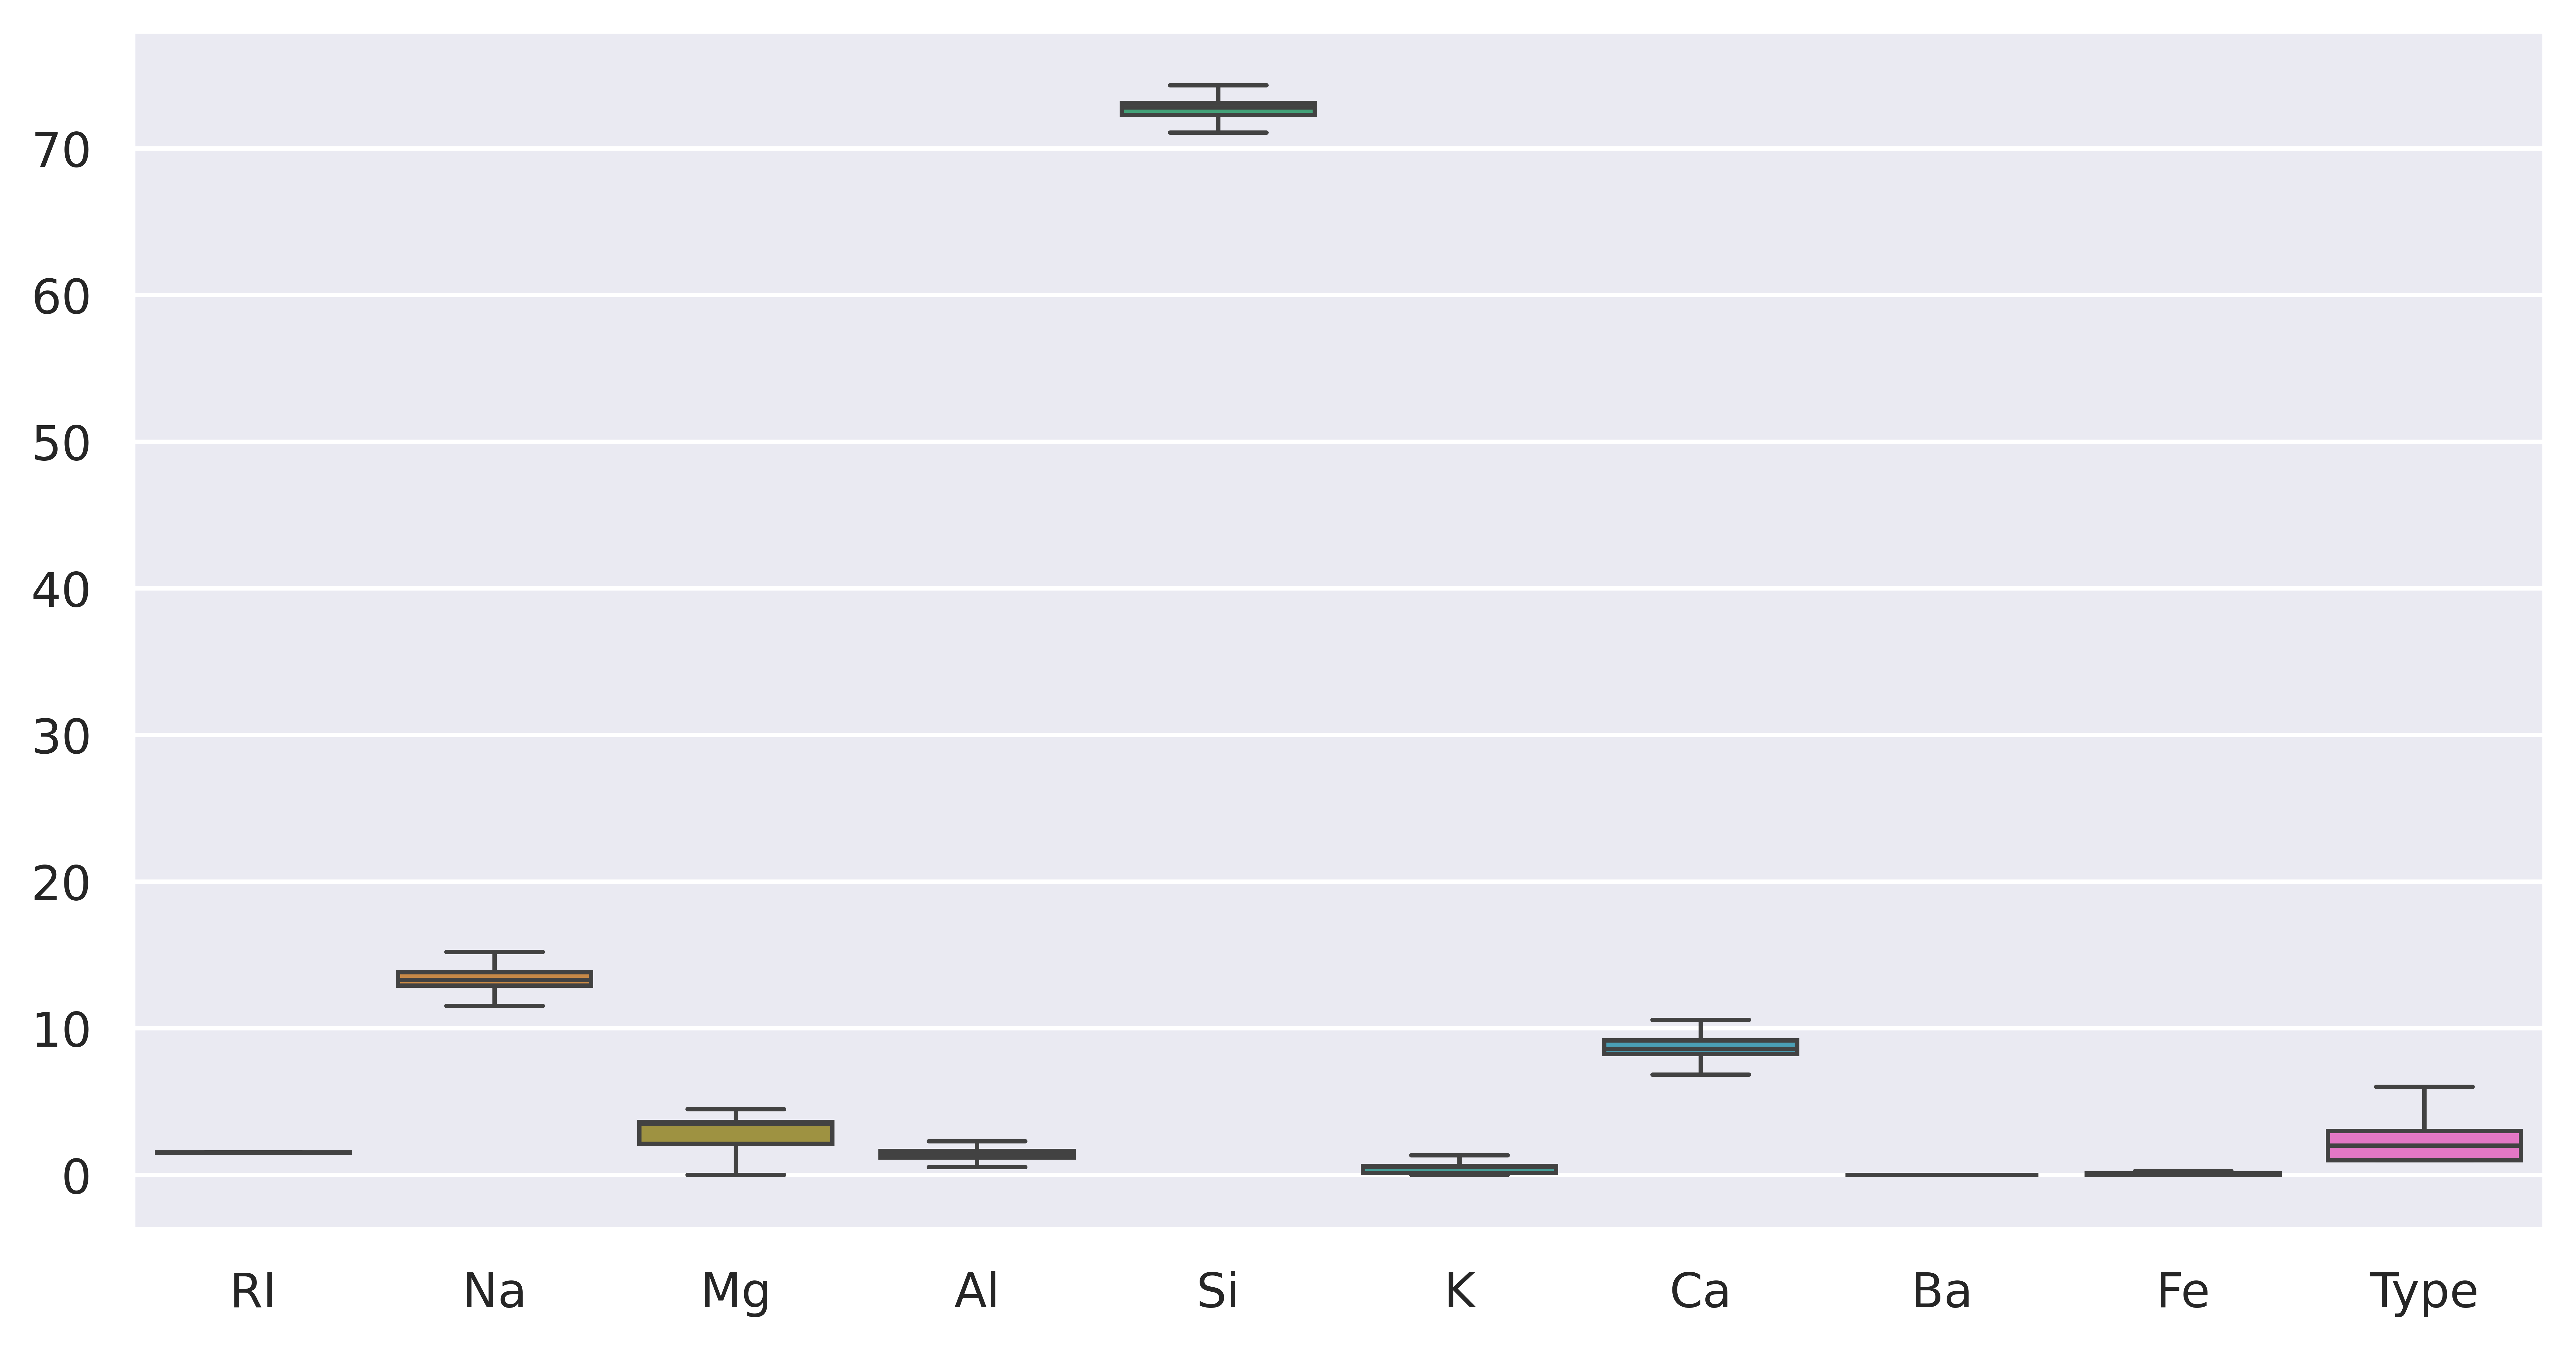

In [13]:
# Boxplot

sns.boxplot(gd)
plt.show()

In [14]:
sns.pairplot(gd)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [15]:
gd.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.064047,-0.032721,-0.470391,-0.532124,-0.344942,0.760449,NaN,0.094617,-0.160699
Na,-0.064047,1.000000,-0.295178,0.208865,-0.164674,-0.493401,-0.102396,NaN,-0.251377,0.496850
Mg,-0.032721,-0.295178,1.000000,-0.474507,-0.210539,0.326625,-0.371040,NaN,0.101841,-0.740712
Al,-0.470391,0.208865,-0.474507,1.000000,0.142701,0.183350,-0.281499,NaN,-0.089357,0.587248
Si,-0.532124,-0.164674,-0.210539,0.142701,1.000000,-0.034263,-0.192171,NaN,-0.064187,0.171085
K,-0.344942,-0.493401,0.326625,0.183350,-0.034263,1.000000,-0.499029,NaN,0.078367,-0.234991
Ca,0.760449,-0.102396,-0.371040,-0.281499,-0.192171,-0.499029,1.000000,NaN,0.103456,0.069202
Ba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fe,0.094617,-0.251377,0.101841,-0.089357,-0.064187,0.078367,0.103456,NaN,1.000000,-0.216006
Type,-0.160699,0.496850,-0.740712,0.587248,0.171085,-0.234991,0.069202,NaN,-0.216006,1.000000


In [16]:
# removing columns because it containa NAN value after removing outliers
gd.drop(columns=['Ba'],inplace=True)

In [17]:
gd.corr()

,RI,Na,Mg,Al,Si,K,Ca,Fe,Type
RI,1.000000,-0.064047,-0.032721,-0.470391,-0.532124,-0.344942,0.760449,0.094617,-0.160699
Na,-0.064047,1.000000,-0.295178,0.208865,-0.164674,-0.493401,-0.102396,-0.251377,0.496850
Mg,-0.032721,-0.295178,1.000000,-0.474507,-0.210539,0.326625,-0.371040,0.101841,-0.740712
Al,-0.470391,0.208865,-0.474507,1.000000,0.142701,0.183350,-0.281499,-0.089357,0.587248
Si,-0.532124,-0.164674,-0.210539,0.142701,1.000000,-0.034263,-0.192171,-0.064187,0.171085
K,-0.344942,-0.493401,0.326625,0.183350,-0.034263,1.000000,-0.499029,0.078367,-0.234991
Ca,0.760449,-0.102396,-0.371040,-0.281499,-0.192171,-0.499029,1.000000,0.103456,0.069202
Fe,0.094617,-0.251377,0.101841,-0.089357,-0.064187,0.078367,0.103456,1.000000,-0.216006
Type,-0.160699,0.496850,-0.740712,0.587248,0.171085,-0.234991,0.069202,-0.216006,1.000000


# Standard Scaler

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [19]:
data = sc.fit_transform(gd)
data

array([[ 1.20149683,  0.31687123,  1.25463857, ..., -0.05361671,
        -0.61909102, -0.89487798],
       [-0.23426899,  0.65422823,  0.63616803, ..., -1.10895863,
        -0.61909102, -0.89487798],
       [-0.83813521,  0.16843415,  0.60142249, ..., -1.16631417,
        -0.61909102, -0.89487798],
       ...,
       [ 1.04947457,  1.28845939, -1.86551055, ..., -0.40922105,
        -0.61909102,  1.8253477 ],
       [-0.69878146,  1.31544795, -1.86551055, ..., -0.36333662,
        -0.61909102,  1.8253477 ],
       [-0.44541102,  1.11303375, -1.86551055, ..., -0.20274111,
        -0.61909102,  1.8253477 ]])

In [20]:
pd.DataFrame(sc.fit_transform(gd))

,0,1,2,3,4,5,6,7,8
0,1.201497,0.316871,1.254639,-0.757758,-1.353189,-1.244720,-0.053617,-0.619091,-0.894878
1,-0.234269,0.654228,0.636168,-0.143604,0.092935,0.128174,-1.108959,-0.619091,-0.894878
2,-0.838135,0.168434,0.601422,0.281579,0.488716,-0.166017,-1.166314,-0.619091,-0.894878
3,-0.213155,-0.263383,0.698710,-0.308954,-0.089734,0.422366,-0.661585,-0.619091,-0.894878
4,-0.314503,-0.182417,0.650066,-0.427060,0.625717,0.356990,-0.833652,-0.619091,-0.894878
...,...,...,...,...,...,...,...,...,...
209,-0.817021,0.991585,-1.865511,2.053178,-0.089734,-1.179344,0.439641,-0.619091,1.825348
210,-0.555205,2.044139,-1.865511,1.344538,0.595272,-1.440848,-0.455105,-0.619091,1.825348
211,1.049475,1.288459,-1.865511,1.415402,1.143277,-1.440848,-0.409221,-0.619091,1.825348
212,-0.698781,1.315448,-1.865511,1.226432,1.432502,-1.440848,-0.363337,-0.619091,1.825348


In [21]:
scaler_data=pd.DataFrame(data,columns=gd.columns)
scaler_data

,RI,Na,Mg,Al,Si,K,Ca,Fe,Type
0,1.201497,0.316871,1.254639,-0.757758,-1.353189,-1.244720,-0.053617,-0.619091,-0.894878
1,-0.234269,0.654228,0.636168,-0.143604,0.092935,0.128174,-1.108959,-0.619091,-0.894878
2,-0.838135,0.168434,0.601422,0.281579,0.488716,-0.166017,-1.166314,-0.619091,-0.894878
3,-0.213155,-0.263383,0.698710,-0.308954,-0.089734,0.422366,-0.661585,-0.619091,-0.894878
4,-0.314503,-0.182417,0.650066,-0.427060,0.625717,0.356990,-0.833652,-0.619091,-0.894878
...,...,...,...,...,...,...,...,...,...
209,-0.817021,0.991585,-1.865511,2.053178,-0.089734,-1.179344,0.439641,-0.619091,1.825348
210,-0.555205,2.044139,-1.865511,1.344538,0.595272,-1.440848,-0.455105,-0.619091,1.825348
211,1.049475,1.288459,-1.865511,1.415402,1.143277,-1.440848,-0.409221,-0.619091,1.825348
212,-0.698781,1.315448,-1.865511,1.226432,1.432502,-1.440848,-0.363337,-0.619091,1.825348


In [22]:
scaler_data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Fe,Type
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,-5.173017e-14,1.942371e-15,-1.328117e-16,-2.324205e-16,2.523423e-15,3.320293e-16,-1.344719e-15,6.225550e-17,-6.640586e-17
std,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00
min,-2.362581e+00,-2.528735e+00,-1.865511e+00,-2.104173e+00,-2.435879e+00,-1.440848e+00,-2.243164e+00,-6.190910e-01,-8.948780e-01
25%,-6.935029e-01,-6.715848e-01,-3.957744e-01,-5.451666e-01,-5.920714e-01,-1.040420e+00,-6.386432e-01,-6.190910e-01,-8.948780e-01
50%,-2.047091e-01,-1.419343e-01,5.527787e-01,-1.436043e-01,1.842688e-01,3.733339e-01,-2.256833e-01,-6.190910e-01,-3.508328e-01
75%,4.192156e-01,5.665154e-01,6.361680e-01,4.941711e-01,6.371339e-01,5.531177e-01,4.310376e-01,5.523102e-01,1.932123e-01
max,2.088293e+00,2.423666e+00,1.254639e+00,2.053178e+00,2.480942e+00,2.943425e+00,2.035559e+00,2.309412e+00,1.825348e+00


# Model Building

In [23]:
x = gd.iloc[:,:-1]
y = gd['Type']

In [24]:
xtrain,xtest,ytrain,ytest = train_test_split (x,y,test_size = 0.2 , random_state = 1)

In [25]:
xtest

,RI,Na,Mg,Al,Si,K,Ca,Fe
108,1.52222,14.43000,0.00,1.00,72.67000,0.10,10.57125,0.08
206,1.51645,14.94000,0.00,1.87,73.11000,0.00,8.67000,0.00
106,1.52311,11.53125,0.00,2.10,71.06875,0.58,10.57125,0.25
107,1.52311,12.30000,0.00,1.00,71.06875,0.12,10.57125,0.24
51,1.51926,13.20000,3.33,1.28,72.36000,0.60,9.14000,0.11
33,1.51753,12.57000,3.47,1.38,73.39000,0.60,8.55000,0.06
59,1.51754,13.39000,3.66,1.19,72.79000,0.57,8.27000,0.11
152,1.51779,13.64000,3.65,0.65,73.00000,0.06,8.93000,0.00
4,1.51742,13.27000,3.62,1.24,73.08000,0.55,8.07000,0.00
31,1.51747,12.84000,3.50,1.14,73.27000,0.56,8.55000,0.00


In [26]:
len(xtrain)

171

In [27]:
rf = RandomForestRegressor()
rf.fit(xtrain,ytrain)
yp = rf.predict(xtest)
yp

array([4.95, 6.  , 2.94, 2.91, 1.79, 1.01, 1.29, 1.63, 1.07, 1.02, 1.73,
       1.87, 2.07, 1.97, 1.31, 2.85, 2.06, 1.5 , 1.86, 1.87, 1.18, 5.98,
       4.92, 1.75, 2.  , 2.57, 2.  , 1.99, 1.61, 1.58, 4.89, 5.84, 1.02,
       1.25, 1.03, 2.09, 2.01, 2.54, 3.52, 1.32, 1.55, 5.98, 5.99])

In [28]:
r2_score(ytest,yp)

0.6493261349437733

In [29]:
print('R2 Score :',r2_score(ytest,yp))

R2 Score : 0.6493261349437733


In [30]:
mean_squared_error(ytest,yp)

0.9107279069767443

In [31]:
np.sqrt(mean_squared_error(ytest,yp))

np.float64(0.954320652074943)

In [32]:
print(f"R2 Score : ,{r2_score(ytest,yp)}")
print(f"MSE : ,{mean_squared_error(ytest,yp)}")
print(f"RMSE : , {np.sqrt(mean_squared_error(ytest,yp))}")

R2 Score : ,0.6493261349437733
MSE : ,0.9107279069767443
RMSE : , 0.954320652074943


In [33]:
# Visualise the rf

In [34]:
len(rf.estimators_)

100

In [35]:
rf.estimators_

[DecisionTreeRegressor(max_features=1.0, random_state=1270536675),
 DecisionTreeRegressor(max_features=1.0, random_state=1587708811),
 DecisionTreeRegressor(max_features=1.0, random_state=373115323),
 DecisionTreeRegressor(max_features=1.0, random_state=907286816),
 DecisionTreeRegressor(max_features=1.0, random_state=868989859),
 DecisionTreeRegressor(max_features=1.0, random_state=1452246592),
 DecisionTreeRegressor(max_features=1.0, random_state=1756792370),
 DecisionTreeRegressor(max_features=1.0, random_state=1412199124),
 DecisionTreeRegressor(max_features=1.0, random_state=1740761837),
 DecisionTreeRegressor(max_features=1.0, random_state=1912348148),
 DecisionTreeRegressor(max_features=1.0, random_state=768275119),
 DecisionTreeRegressor(max_features=1.0, random_state=844951277),
 DecisionTreeRegressor(max_features=1.0, random_state=225746212),
 DecisionTreeRegressor(max_features=1.0, random_state=1643437985),
 DecisionTreeRegressor(max_features=1.0, random_state=49243467),
 De

In [36]:
rf.estimators_[5]

DecisionTreeRegressor(max_features=1.0, random_state=1452246592)

In [37]:
x.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Fe'], dtype='object')

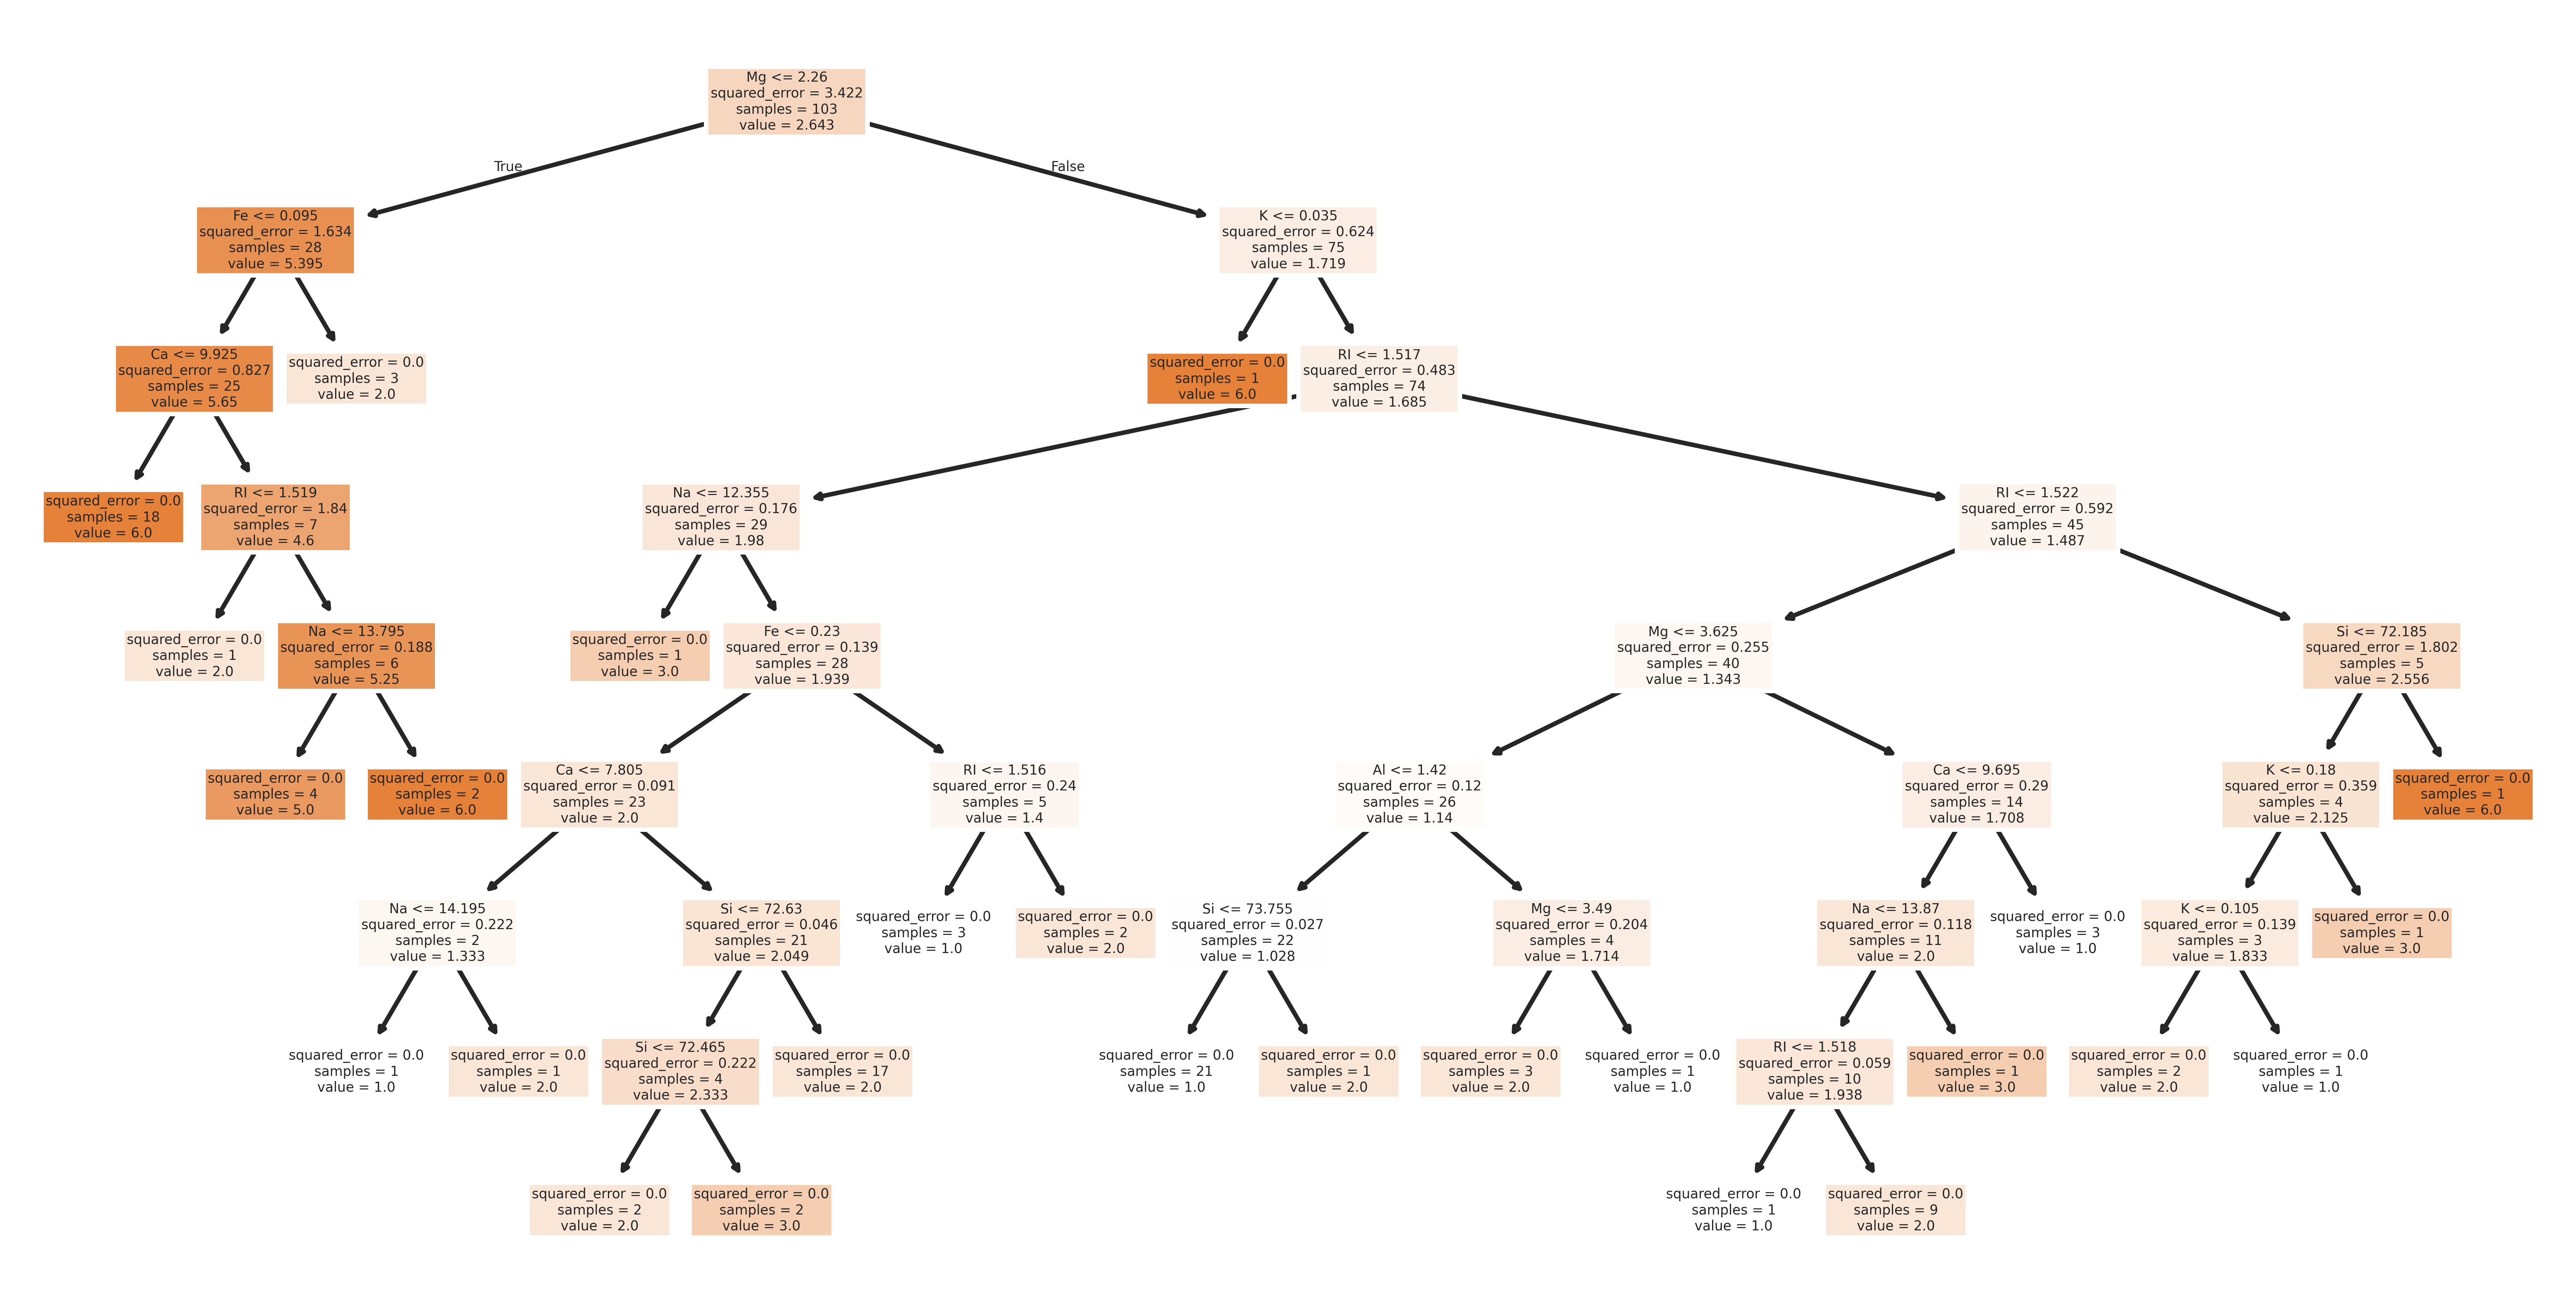

In [38]:
tree.plot_tree(rf.estimators_[5],feature_names=x.columns,
              filled=True)
plt.show()

In [39]:
def prediction(model):
    model.fit(xtrain,ytrain)
    yp = model.predict(xtest)
    print(f"Train Accuracy: {model.score(xtrain,ytrain)}")
    print(f"Test Accuracy: {model.score(xtest,ytest)}")
    print(classification_report(ytest,yp))

In [40]:
prediction(RandomForestClassifier())

Train Accuracy: 1.0
Test Accuracy: 0.7441860465116279
              precision    recall  f1-score   support

         1.0       0.81      0.89      0.85        19
         2.0       0.73      0.67      0.70        12
         3.0       0.50      0.17      0.25         6
         5.0       0.50      1.00      0.67         1
         6.0       0.71      1.00      0.83         5

    accuracy                           0.74        43
   macro avg       0.65      0.75      0.66        43
weighted avg       0.73      0.74      0.72        43



# Fine Tuning Model


In [41]:
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
GradientBoostingClassifier()

GradientBoostingClassifier()

In [42]:
params =  {
    'n_estimators' : [90,110,150],
    'learning_rate' : [0.1,0.3,0.7],
    'max_depth' : [2,4,6,8]
}

In [43]:
from sklearn.model_selection import GridSearchCV


grid = GridSearchCV(GradientBoostingClassifier(),params,verbose=1)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.3, 0.7],
                         'max_depth': [2, 4, 6, 8],
                         'n_estimators': [90, 110, 150]},
             verbose=1)

In [44]:
grid.best_params_

{'learning_rate': 0.7, 'max_depth': 4, 'n_estimators': 150}

In [45]:
prediction(GradientBoostingClassifier(learning_rate=0.1,max_depth=2,n_estimators=90))

Train Accuracy: 1.0
Test Accuracy: 0.7209302325581395
              precision    recall  f1-score   support

         1.0       0.71      0.79      0.75        19
         2.0       0.69      0.75      0.72        12
         3.0       1.00      0.17      0.29         6
         5.0       1.00      1.00      1.00         1
         6.0       0.71      1.00      0.83         5

    accuracy                           0.72        43
   macro avg       0.82      0.74      0.72        43
weighted avg       0.75      0.72      0.69        43



In [47]:
def prediction(model):
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score

    global x, y

    valid_classes = [1, 2, 3]
    mask = np.isin(y, valid_classes)
    x_clean = x[mask]
    y_clean = y[mask].astype(int) - 1  # shift to [0, 1, 2]

    x_train, x_test, y_train, y_test = train_test_split(x_clean, y_clean, test_size=0.2, random_state=42)

    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print("✅ Model trained successfully. Accuracy:", acc)


In [48]:
from xgboost import XGBClassifier

prediction(XGBClassifier())

✅ Model trained successfully. Accuracy: 0.8181818181818182


In [49]:
ytrain

,Type
47,1.0
202,6.0
27,1.0
58,1.0
40,1.0
...,...
203,6.0
137,2.0
72,2.0
140,2.0


In [50]:
xtrin,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3,random_state=42)

In [51]:
ytrain

,Type
137,2.0
65,1.0
108,2.0
181,6.0
31,1.0
...,...
106,2.0
14,1.0
92,2.0
179,6.0


# Interview Question

## 1. Explain Bagging and Boosting methods. How is it different from each other?
- Bagging and Boosting are ensemble methods used to improve model performance by combining multiple models, but they work differently:
1.Bagging (Bootstrap Aggregating) involves training multiple models independently on different subsets of data created by randomly sampling with replacement. The final prediction is an average (regression) or a majority vote (classification). It reduces variance and prevents overfitting, making models like Random Forest more stable.
2.Boosting trains models sequentially, where each model learns from the mistakes of the previous one by giving more weight to misclassified data. The predictions are combined using a weighted approach. Boosting focuses on reducing bias and improving weak learners, as seen in algorithms like AdaBoost or Gradient Boosting.
## 2. Explain how to handle imbalance in the data.
Handling imbalanced data ensures the model treats both classes fairly. One approach is oversampling, where more samples from the minority class are added to balance the dataset, or undersampling, where samples from the majority class are reduced. Adjusting class weights during training can also help by giving more importance to the minority class. Synthetic data generation methods like SMOTE create new samples for the minority class. Specialized algorithms, like balanced versions of Random Forest, are also effective. Additionally, using metrics like precision, recall, or F1-score instead of accuracy ensures better evaluation of the model's performance.